# 1. Group by

Groupby in Pandas is a function that groups data according to different sets of variables. This means you can use the groupby function to put related rows into groups of data. This function is typically used in what is often referred to as the split-apply-combine process.

The split-apply-combine process means that you start off by dividing related records in your data into multiple groups. You would then apply some changes to each group created and then combine the old with the new output you created.

Here's a practical example let's look at our rental listings dataset again and return the average number of bedrooms by location of the listing. We will use the groupby function to group all listings by unique locations and then apply a function to return the median for each group.

In [35]:
import pandas as pd
df = pd.read_csv('rental_listings_nigeria/prop24.csv')
#filling missing data using backward filling
df['bedrooms'] = df['bedrooms'].fillna(df.bedrooms.median())
#groupby location and return mean per group
df.groupby('location')['bedrooms'].median()

location
 Arepo, Citiview Estate, Ogun Waterside, Ogun Waterside                  3.0
 Banana Island, Banana Island, Lekki                                     3.0
 Gerrard Road, Ikoyi-obalende, Ikoyi-obalende                            4.0
 Mike Adegbite Ave, Lekki, Lekki                                         3.0
 SIMEON AKINLONU STREET, ONIRU ESTATE, LAGOS , Victoria Island, Lekki    3.0
                                                                        ... 
victoria crest estate, Lekki, Lekki                                      3.0
victoria island , Victoria Island, Lekki                                 2.5
victoria island, Lekki, Lekki                                            5.0
yaba, Lagos Mainland, Lagos Mainland                                     3.0
yabatech, Lagos Mainland, Lagos Mainland                                 4.0
Name: bedrooms, Length: 355, dtype: float64

From the output we see that we have the unique locations, which means each location has been grouped into a group with other similar locations. For each group we then independently find the median of the values in bedroom column

We can also group by multiple columns. For example let us assume we want to know the median number of bedrooms for houses listed in this site by location and by state. We will first groupby state, then by location and then return the median for each combination of groups. There are better scenarios where this might be useful to do, however this example will give you a good idea for the output you should expect when doing this.

In [38]:
df.groupby(['state','location'])['bedrooms'].median()

state  location                                                   
Abuja  1066 Ademola Adetokunbo Cres, Wuse II, Wuse II                  3.0
       35 Pope John Paul 2 St, Maitama, Maitama                       10.0
       36 Osun Cres, Maitama, Maitama                                  5.0
       Ajesa St Wuse, Wuse II, Wuse II                                 3.0
       Apo Legislative Quarters, Apo, Abuja                            4.0
                                                                      ... 
Lagos  yaba, Lagos Mainland, Lagos Mainland                            3.0
       yabatech, Lagos Mainland, Lagos Mainland                        4.0
Ogun    Arepo, Citiview Estate, Ogun Waterside, Ogun Waterside         3.0
       Arepo, Citiview Estate, Ogun Waterside, Ogun Waterside          4.0
       Iyana cele rounder Abeokuta, Abeokuta North, Abeokuta North     3.0
Name: bedrooms, Length: 355, dtype: float64

In later modules we will be using this function a lot more. To read more about groupby here are a few sources to read through:
* How to use the Pandas groupby for grouping data and applying functions, BitDegree: https://www.bitdegree.org/learn/pandas-groupby
* Python Pandas Groupby Tutorial: https://www.marsja.se/python-pandas-groupby-tutorial-examples/
    

# 2. Merging, joining and concatenating dataframes

Although there are three common ways to join/merge datasets in Pandas we typically default to using pandas.DataFrame.merger. We can use merge to carry out a left, right, outer and inner join, depending on what we specify (the default is an inner join). Before we go further let's look at the different types of joins we just mentioned:

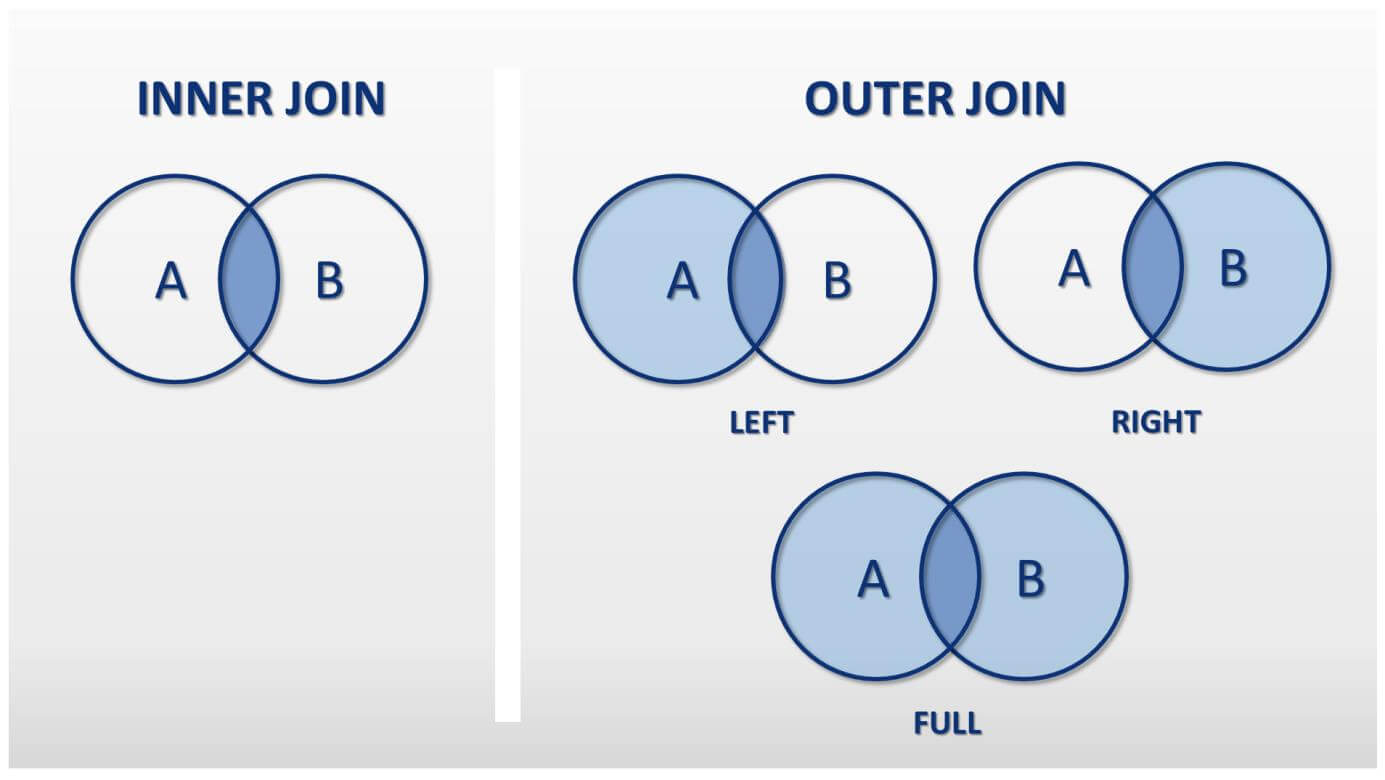

## 2.1.1 Inner Join

Looking at the above image we see that an inner join refers to a scenario where we only join A and B where the values we are joining exist in both datasets. Let's look at a practical example of this:

We will start off by observing our first dataset

In [56]:
names = pd.read_csv('fullnames_ids.csv')
names

,ID,Name,Surname
0,9112,Halima,Oni
1,9112,Halima,Oni
2,9112,Halima,Oni
3,9111,Nyamwali,Larbi
4,9113,Jacline,Iddrisu
5,9114,Thadei,Juma
6,9115,Cosmas,Zedi
7,9116,Simbarashe,Moyo
8,9117,Takudzwa,Ndlovu
9,9118,Gabisile,Ndabezitha


In [57]:
gender_age = pd.read_csv('gender_age.csv')
gender_age

,ID,Number,Age,Gender
0,9109,11-11-1111,20,Male
1,9110,11-12-1111,25,Female
2,9111,12-12-1222,28,Female
3,9112,22-22-1122,40,Male
4,9113,09-12-1432,50,Female
5,9114,04-12-4343,79,Female
6,9115,34-23-3534,29,Male
7,9116,23-34-5454,30,Male
8,9117,23-54-6565,22,Male
9,9118,34-54-6565,19,Female


We will specify the key/column we will be using for the merge. For this example we will be using the ID as a key because this is a unique value, each ID is unique to the individual it is assigned to.

Practically this means that we will only merge IDs that are common between both dataframes. The output will be a merger of all columns in both datasets.

In [44]:
names.merge(gender_age,how='inner',on='ID')

,ID,Name,Surname,Number,Age,Gender
0,9112,Halima,Oni,22-22-1122,40,Male
1,9112,Halima,Oni,22-22-1122,40,Male
2,9112,Halima,Oni,22-22-1122,40,Male
3,9112,Halima,Oni,22-22-1122,40,Male
4,9112,Halima,Oni,22-22-1122,40,Male
5,9111,Nyamwali,Larbi,12-12-1222,28,Female
6,9111,Nyamwali,Larbi,12-12-1222,28,Female
7,9111,Nyamwali,Larbi,12-12-1222,28,Female
8,9113,Jacline,Iddrisu,09-12-1432,50,Female
9,9114,Thadei,Juma,04-12-4343,79,Female


The how argument allows to choose whether we want to do an inner, left, right or outer merge. We can also opt to merge using multiple columns as the key. 

You can read the pandas.DataFrame.merge() documentation for more context on this:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

## 2.1.2 Outer Join

We can also opt to merge everything in both the names and gender_age datasets. In this scenario we are not looking for matching IDs we join both datasets regardless of whether there are matches.

In [45]:
names.merge(gender_age,how='outer',on='ID')

,ID,Name,Surname,Number,Age,Gender
0,9112,Halima,Oni,22-22-1122,40.0,Male
1,9112,Halima,Oni,22-22-1122,40.0,Male
2,9112,Halima,Oni,22-22-1122,40.0,Male
3,9112,Halima,Oni,22-22-1122,40.0,Male
4,9112,Halima,Oni,22-22-1122,40.0,Male
5,9111,Nyamwali,Larbi,12-12-1222,28.0,Female
6,9111,Nyamwali,Larbi,12-12-1222,28.0,Female
7,9111,Nyamwali,Larbi,12-12-1222,28.0,Female
8,9113,Jacline,Iddrisu,09-12-1432,50.0,Female
9,9114,Thadei,Juma,04-12-4343,79.0,Female


## 2.1.3 Left and Right Join

Using our datasets as an example, with the right join we take all the values in the rightmost dataset in our merge statement and merge IDs from the leftmost dataset that match the IDs in the dataset on the right of the statement

In [46]:
names.merge(gender_age,how='right',on='ID')

,ID,Name,Surname,Number,Age,Gender
0,9112,Halima,Oni,22-22-1122,40,Male
1,9112,Halima,Oni,22-22-1122,40,Male
2,9112,Halima,Oni,22-22-1122,40,Male
3,9112,Halima,Oni,22-22-1122,40,Male
4,9112,Halima,Oni,22-22-1122,40,Male
5,9111,Nyamwali,Larbi,12-12-1222,28,Female
6,9111,Nyamwali,Larbi,12-12-1222,28,Female
7,9111,Nyamwali,Larbi,12-12-1222,28,Female
8,9113,Jacline,Iddrisu,09-12-1432,50,Female
9,9114,Thadei,Juma,04-12-4343,79,Female


To put in practical terms gender_age is the dataframe that appears on the rightmost side in our merge statement. This means that we will take the entire dataset from gender_age and then also include IDs from the names dataframe that match the IDs on gender_age.

Left join does the same thing with the only difference being we would take all the data from the dataset that appears on the left of our statement and matching IDs from the right

## 2.2 Difference between merge join and concatenate

There are three common ways to join/merge datasets in Pandas. These are; merging, joining and concatenating datasets. While these may all sound the same, there are some major differences. 

Firstly, merging using pandas.DataFrame.merge() is generally regarded as the underlying function for merging and joining behaviour. We use the merge() function to combine two of more dataframes on the basis of values of common columns. Join is actually quite similar to merge(), however if there are overlapping columns, with join you will have to add a suffiz to the overlapping column name from the leftmost dataframe.

The concat function on the otherhand works on both axes. This means that we can join two or more dataframes horizontally (adding more columns based on the dataframes being added) or vertically (adding more rows from the datasets that we are adding).

Let us look at a practical example of using concat on both axes

In [48]:
pd.concat([names,gender_age],axis=0)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Age,Gender,ID,Name,Number,Surname
0,NaN,NaN,9112,Halima,NaN,Oni
1,NaN,NaN,9112,Halima,NaN,Oni
2,NaN,NaN,9112,Halima,NaN,Oni
3,NaN,NaN,9111,Nyamwali,NaN,Larbi
4,NaN,NaN,9113,Jacline,NaN,Iddrisu
5,NaN,NaN,9114,Thadei,NaN,Juma
6,NaN,NaN,9115,Cosmas,NaN,Zedi
7,NaN,NaN,9116,Simbarashe,NaN,Moyo
8,NaN,NaN,9117,Takudzwa,NaN,Ndlovu
9,NaN,NaN,9118,Gabisile,NaN,Ndabezitha


With the concat function using axis=0 we added all the rows from gender_age to the original dataframe

In [58]:
pd.concat([names,gender_age],axis=1)

,ID,Name,Surname,ID,Number,Age,Gender
0,9112,Halima,Oni,9109.0,11-11-1111,20.0,Male
1,9112,Halima,Oni,9110.0,11-12-1111,25.0,Female
2,9112,Halima,Oni,9111.0,12-12-1222,28.0,Female
3,9111,Nyamwali,Larbi,9112.0,22-22-1122,40.0,Male
4,9113,Jacline,Iddrisu,9113.0,09-12-1432,50.0,Female
5,9114,Thadei,Juma,9114.0,04-12-4343,79.0,Female
6,9115,Cosmas,Zedi,9115.0,34-23-3534,29.0,Male
7,9116,Simbarashe,Moyo,9116.0,23-34-5454,30.0,Male
8,9117,Takudzwa,Ndlovu,9117.0,23-54-6565,22.0,Male
9,9118,Gabisile,Ndabezitha,9118.0,34-54-6565,19.0,Female


Using axis=1 on the other hand we joined all additional columns in  gender_age to names. All this does is add our gender_age dataframe to the right of our names dataframe


Pandas Merge, Join and Concat: How to and examples: https://kite.com/blog/python/pandas-merge-join-concat/

# 3. Reshaping

One important issue that you may encounter when dealing with dataframes in Pandas is figuring out how to reshape and transform your dataframe. 

**What do we mean by reshape and transform?**

Let's imagine you have a long formatted dataframe. This refers to a dataframe where; i.) each variable forms a column, ii.) each observation forms a row, iii.) each type of observational unit forms a table. A good example could be a dataframe where each row is a recorded transaction from a client buying our hypothetical company's project. 

Let's start off by creating this dataframe.


In [64]:
transactions = [{'date':'2019-01-01','customer':'Nyamwali','payment':'100'},
               {'date':'2019-01-02','customer':'Halima','payment':'150'},
               {'date':'2019-01-03','customer':'Joe','payment':'250'},
               {'date':'2019-01-04','customer':'Halima','payment':'200'},
               {'date':'2019-01-05','customer':'Harry','payment':'300'},
               {'date':'2019-01-06','customer':'Sipho','payment':'400'},
               {'date':'2019-01-07','customer':'Halima','payment':'250'},
               {'date':'2019-01-08','customer':'Sipho','payment':'200'},
               {'date':'2019-01-09','customer':'Harry','payment':'170'},
               {'date':'2019-01-10','customer':'Halima','payment':'190'},
               {'date':'2019-01-11','customer':'Joe','payment':'120'},
               {'date':'2019-01-12','customer':'Joe','payment':'130'}]
df = pd.DataFrame(transactions)

Now let's assume we want to pivot our long format dataframe such that we can easily compare the transactions carried out by individuals over the 12 day span included in our dataframe. To accomplish this we would need to convert our long format dataframe to a wide or unstacked format dataframe. This means that the table will be wider, as each column will be for the individuals in our dataframe and each row the transactions carried out. We can use the pd.pivot function to accomplish this

In [105]:
df.pivot(index='date',columns='customer',values='payment')

customer,Halima,Harry,Joe,Nyamwali,Sipho
date,,,,,
2019-01-01,NaN,NaN,NaN,100,NaN
2019-01-02,150,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,250,NaN,NaN
2019-01-04,200,NaN,NaN,NaN,NaN
2019-01-05,NaN,300,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN,NaN,400
2019-01-07,250,NaN,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN,NaN,200
2019-01-09,NaN,170,NaN,NaN,NaN


Let's look at what just happened, we reshaped our dataframe and specified that we would use the unique customer names as the columns and the payments as the values added to each row.

You can read more about the pivot() documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html

There is often more than one way to do something in Python, you can also opt to use the unstack() function to produce a similar result. The stack() and unstack() functions in Pandas either convert the data into stacked format; where the columns are stacked row wise or unstack columns that are already stacked (multilevel columns).

You can read more about how this function works:http://www.datasciencemadesimple.com/reshape-using-stack-unstack-function-pandas-python/

In order to unstack our dataframe in such a way that it creates what is similar to our pivoted table, we need to set the index of our dataframe as the date and customer columns and then unstack the payments column so the values appear as rows in the existing index columns. Let's look at this practically

In [73]:
x = df.set_index(['date','customer']).unstack()
x

payment                          
customer    Halima Harry  Joe Nyamwali Sipho
date                                        
2019-01-01     NaN   NaN  NaN      100   NaN
2019-01-02     150   NaN  NaN      NaN   NaN
2019-01-03     NaN   NaN  250      NaN   NaN
2019-01-04     200   NaN  NaN      NaN   NaN
2019-01-05     NaN   300  NaN      NaN   NaN
2019-01-06     NaN   NaN  NaN      NaN   400
2019-01-07     250   NaN  NaN      NaN   NaN
2019-01-08     NaN   NaN  NaN      NaN   200
2019-01-09     NaN   170  NaN      NaN   NaN
2019-01-10     190   NaN  NaN      NaN   NaN
2019-01-11     NaN   NaN  120      NaN   NaN
2019-01-12     NaN   NaN  130      NaN   NaN

If we want to move back to a stacked dataframe we can use the stack function on our dataframe.

In [78]:
x.stack()

,,payment
date,customer,
2019-01-01,Nyamwali,100
2019-01-02,Halima,150
2019-01-03,Joe,250
2019-01-04,Halima,200
2019-01-05,Harry,300
2019-01-06,Sipho,400
2019-01-07,Halima,250
2019-01-08,Sipho,200
2019-01-09,Harry,170


In [72]:
x.columns

MultiIndex([('payment',   'Halima'),
            ('payment',    'Harry'),
            ('payment',      'Joe'),
            ('payment', 'Nyamwali'),
            ('payment',    'Sipho')],
           names=[None, 'customer'])

The only difference with the unstack function as you will notice is that the output gives us a MultiIndex dataframe. This can also be referred to as Hierarchical indexing. This is not something you necessarily need to know about. However if you are interested in learning more here is a source that can help: https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html


### 3.1 Unpivoting data using the melt function

We can use another function, the melt function, to convert a dataframe from one format to another. The best thing about the melt function is that it has enough flexibility to allow you to unpivot data however you want to.

In [111]:
pd.melt(df,id_vars='customer',value_vars='payment',value_name='payment',var_name='label')

,customer,label,payment
0,Nyamwali,payment,100
1,Halima,payment,150
2,Joe,payment,250
3,Halima,payment,200
4,Harry,payment,300
5,Sipho,payment,400
6,Halima,payment,250
7,Sipho,payment,200
8,Harry,payment,170
9,Halima,payment,190


In the above example we returned an unpivoted dataframe showing the  to show the name of the customer and payments along with a column we named label showing the name of the payments column. If we had not specified value_vars we would by default get the values from all the columns we did not set as id_vars